Parte 1:

In [1]:
import pandas as pd
import os

1.1 en PDF


In [3]:
#2)
import pandas as pd

file_path_hogar = 'C:\\Users\\Santiago\\Desktop\\2024\\1er cuatri\\Big Data\\Big-Data-TP4\\EPH_usu_4to_Trim_2023_xlsx\\usu_hogar_T423.xlsx'
file_path_individual = 'C:\\Users\\Santiago\\Desktop\\2024\\1er cuatri\\Big Data\\Big-Data-TP4\\EPH_usu_4to_Trim_2023_xlsx\\usu_individual_T423.xlsx'

df_hogar = pd.read_excel(file_path_hogar)
df_individual = pd.read_excel(file_path_individual)

#Nos dimos cuenta que al mergear las bases hogar e individual algunas variables que estaban en ambas bases desaparecian. Por lo tanto le cambiamos el nombre a la variable.
df_individual.rename(columns={'ITF': 'ITF_individual', 'IPCF': 'IPCF_individual'}, inplace=True)

# Mantenemos los datos de GBA.
df_hogar_filtrado = df_hogar[df_hogar['REGION'] == 1]
df_individual_filtrado = df_individual[df_individual['REGION'] == 1]


print("DataFrame Hogar Filtrado:")
print(df_hogar_filtrado.head())

print("\nDataFrame Individual Filtrado:")
print(df_individual_filtrado.head())


DataFrame Hogar Filtrado:
                           CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  REALIZADA  \
21  TQRMNOTPRHLLLNCDEIIAD00854774  2023          4          1          1   
33  TQRMNOSPPHLNMQCDEIJAH00854986  2023          4          1          1   
34  TQRMNOTQWHMKMQCDEIJAH00812571  2023          4          1          1   
61  TQRMNOQRWHLMOLCDEIJAH00855003  2023          4          1          1   
62  TQRMNOQXWHJLOTCDEIJAH00802521  2023          4          1          1   

    REGION MAS_500  AGLOMERADO  PONDERA  IV1  ... GDECCFR  PDECCFR  ADECCFR  \
21       1       S          32     2317    2  ...    12.0      NaN       12   
33       1       S          33     2431    1  ...     1.0      NaN        1   
34       1       S          33     4054    1  ...     9.0      NaN        9   
61       1       S          33     2142    1  ...     3.0      NaN        4   
62       1       S          33     1464    1  ...    12.0      NaN       12   

   PONDIH  VII1_1  VII1_2  VII2_1  VII2_2 

In [4]:
#Ahora voy a mergear
df_merged = pd.merge(df_individual_filtrado, df_hogar_filtrado, on=['CODUSU', 'NRO_HOGAR'])

print(df_merged.head())

                          CODUSU  ANO4_x  TRIMESTRE_x  NRO_HOGAR  COMPONENTE  \
0  TQRMNOTUUHJMLPCDEIIAD00801670    2023            4          1           1   
1  TQRMNOTUUHJMLPCDEIIAD00801670    2023            4          1           2   
2  TQRMNOPUUHJKLQCDEIIAD00793187    2023            4          1           1   
3  TQRMNOPUUHJKLQCDEIIAD00793187    2023            4          1           2   
4  TQRMNOPUTHKLMNCDEIIAD00791268    2023            4          1           1   

   H15  REGION_x MAS_500_x  AGLOMERADO_x  PONDERA_x  ...  GDECCFR_y  \
0    1         1         S            32       1775  ...        8.0   
1    1         1         S            32       1775  ...        8.0   
2    2         1         S            32        609  ...       12.0   
3    1         1         S            32        609  ...       12.0   
4    1         1         S            32       3129  ...        8.0   

   PDECCFR_y ADECCFR_y  PONDIH_y  VII1_1  VII1_2  VII2_1  VII2_2  VII2_3  \
0        NaN    

In [5]:
#3)

#Corrigo variables binarias, porque nos dimos cuenta que algunos tenian valores distintos a los posubles.
df_merged = df_merged[(df_merged['V1'] == 1) | (df_merged['V1'] == 2)]
df_merged = df_merged[(df_merged['V2'] == 1) | (df_merged['V2'] == 2)]
df_merged = df_merged[(df_merged['V3'] == 1) | (df_merged['V3'] == 2)]
df_merged = df_merged[(df_merged['V4'] == 1) | (df_merged['V4'] == 2)]
df_merged = df_merged[(df_merged['V5'] == 1) | (df_merged['V5'] == 2)]
df_merged = df_merged[(df_merged['V6'] == 1) | (df_merged['V6'] == 2)]
df_merged = df_merged[(df_merged['V7'] == 1) | (df_merged['V7'] == 2)]
df_merged = df_merged[(df_merged['V8'] == 1) | (df_merged['V8'] == 2)]
df_merged = df_merged[(df_merged['V9'] == 1) | (df_merged['V9'] == 2)]
df_merged = df_merged[(df_merged['V10'] == 1) | (df_merged['V10'] == 2)]
df_merged = df_merged[(df_merged['V11'] == 1) | (df_merged['V11'] == 2)]
df_merged = df_merged[(df_merged['V12'] == 1) | (df_merged['V12'] == 2)]
df_merged = df_merged[(df_merged['V13'] == 1) | (df_merged['V13'] == 2)]
df_merged = df_merged[(df_merged['V14'] == 1) | (df_merged['V14'] == 2)]
df_merged = df_merged[(df_merged['V15'] == 1) | (df_merged['V15'] == 2)]
df_merged = df_merged[(df_merged['V16'] == 1) | (df_merged['V16'] == 2)]
df_merged = df_merged[(df_merged['V17'] == 1) | (df_merged['V17'] == 2)]
df_merged = df_merged[(df_merged['V18'] == 1) | (df_merged['V18'] == 2)]
df_merged = df_merged[(df_merged['V19_A'] == 1) | (df_merged['V19_A'] == 2)]
df_merged = df_merged[(df_merged['V19_B'] == 1) | (df_merged['V19_B'] == 2)]
df_merged = df_merged[(df_merged['V21'] == 1) | (df_merged['V21'] == 2)]
df_merged = df_merged[(df_merged['V22'] == 1) | (df_merged['V22'] == 2)]

# Eliminamos columnas que no aportaban ningun valor. Muchas de ellas eran por ejemplo "otros"
df_merged.drop(['IV1_ESP', 'IV3_ESP', 'IV7_ESP', 'II7_ESP', 'II8_ESP'], axis=1, inplace=True)

#Ingresos
df_merged = df_merged[df_merged['IPCF'] >= 0]
df_merged = df_merged[df_merged['ITF'] >= 0]

#Edad
df_merged = df_merged[df_merged['CH06'] >= 0]

#Horas Trabajadas
df_merged = df_merged[(df_merged['PP3E_TOT'] >= 0) & (df_merged['PP3E_TOT'] <= 168)]
df_merged = df_merged[(df_merged['PP3F_TOT'] >= 0) & (df_merged['PP3F_TOT'] <= 168)]

#Sobre cantidad de habitantes en el hogar
df_merged = df_merged[df_merged['IX_TOT'] >= 0]
df_merged = df_merged[df_merged['IX_MEN10'] >= 0]
df_merged = df_merged[df_merged['IX_MAYEQ10'] >= 0]

#Habitaciones
df_merged = df_merged[df_merged['II1'] >= 0]
df_merged = df_merged[(df_merged['II2'] >= 0) & (df_merged['II2'] <= df_merged['II1'])]
df_merged = df_merged[(df_merged['II3_1'] >= 0) & (df_merged['II3_1'] <= df_merged['II3'])]

# Mostrar el DataFrame después de filtrar los valores sin sentido
print("\nDataFrame de Hogares después de filtrar valores sin sentido:")
print(df_merged.head())


DataFrame de Hogares después de filtrar valores sin sentido:
                           CODUSU  ANO4_x  TRIMESTRE_x  NRO_HOGAR  COMPONENTE  \
0   TQRMNOTUUHJMLPCDEIIAD00801670    2023            4          1           1   
4   TQRMNOPUTHKLMNCDEIIAD00791268    2023            4          1           1   
5   TQRMNOPUTHKLMNCDEIIAD00791268    2023            4          1           2   
7   TQRMNORXPHKLMNCDEIIAD00791273    2023            4          2           1   
11  TQRMNOQWYHLMKRCDEIJAH00854987    2023            4          1           1   

    H15  REGION_x MAS_500_x  AGLOMERADO_x  PONDERA_x  ...  GDECCFR_y  \
0     1         1         S            32       1775  ...        8.0   
4     1         1         S            32       3129  ...        8.0   
5     1         1         S            32       3129  ...        8.0   
7     1         1         S            32       3357  ...        8.0   
11    1         1         S            33       1656  ...        4.0   

    PDECCFR_y ADEC

In [6]:
#4)
#En el PDF explicamos porque hacemos estas variables y como suman.
#Creamos la variable habitantes por habitación (excluyendo garage, cocina, pasillos, etc.)
df_merged['habitantes_por_habitacion'] = df_merged['IX_TOT'] / df_merged['IV2']

#Ingreso por personas economicamente activas
df_merged['ITF_por_personas_10_o_mas'] = df_merged['ITF'] / df_merged['IX_MAYEQ10']

#Ingreso total familiar por asistencia estatal, iglesias, etc.
df_merged['Ingreso_total_familiar_asistencia'] = df_merged.groupby(['CODUSU', 'NRO_HOGAR'])['V5_M'].transform('sum')


In [31]:
#5)

variables = ['IV12_3', 'IX_TOT', 'V5', 'V19_B', 'II9']

descriptive_stats = df_merged[variables].describe()
print(descriptive_stats)
#Se realiza un analisis exhaustivos de los resultados en el PDF

            IV12_3       IX_TOT           V5        V19_B          II9
count  3443.000000  3443.000000  3443.000000  3443.000000  3443.000000
mean      1.991577     3.376997     1.864653     1.999419     1.028464
std       0.091402     1.647869     0.342144     0.024098     0.245358
min       1.000000     1.000000     1.000000     1.000000     0.000000
25%       2.000000     2.000000     2.000000     2.000000     1.000000
50%       2.000000     3.000000     2.000000     2.000000     1.000000
75%       2.000000     4.000000     2.000000     2.000000     1.000000
max       2.000000    12.000000     2.000000     2.000000     4.000000


In [ ]:
#6

import matplotlib.pyplot as plt


x = df_merged['ITF']
y = df_merged['V5']

# Creamos un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('ITF')
plt.ylabel('V5')
plt.title('Relación entre ITF y V5')

# Ajustar el rango del eje x
plt.xlim(left=0, right=5000000)  

plt.grid(True)
plt.show()

plt.text(50, 1.5, 
         "Este scatter plot nos muestra la relación entre el Ingreso Total Familiar (ITF) y el hecho de que los hogares vivan de planes o ayudas sociales (V5).\n"
         "La variable V5 es una variable dummy que toma valor 1 si el encuestado responde que recibe ayuda social y 2 si el encuestado responde que no recibe ayuda social.\n"
         "Podemos ver que los mayores niveles de ITF están sobre el 2 en el eje Y. Esto quiere decir que los hogares que reportan mayor ITF son aquellos que no utilizan ayudas sociales para vivir.",
         fontsize=10, style='italic',
         bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})

plt.show()

In [9]:
#7)
tabla_adulto_equiv = 'C:\\Users\\Santiago\\Desktop\\2024\\1er cuatri\\Big Data\\Big-Data-TP3\\tabla_adulto_equiv.xlsx'
df_equivalencias = pd.read_excel(tabla_adulto_equiv)

# Limpiar y formatear la tabla de equivalencias 
df_equivalencias.columns = ['Edad', 'Mujeres', 'Varones']
df_equivalencias['Edad'] = df_equivalencias['Edad'].str.strip()

# Definir la función para mapear edad y sexo a adultos_equiv
def obtener_adultos_equiv(edad, sexo):
    if edad < 1:
        edad_str = 'Menor de 1 año'
    elif 1 <= edad <= 9:
        edad_str = f'{edad} años'
    elif 10 <= edad <= 17:
        edad_str = f'{edad} años'
    elif 18 <= edad <= 29:
        edad_str = '18 a 29 años'
    elif 30 <= edad <= 45:
        edad_str = '30 a 45 años'
    elif 46 <= edad <= 60:
        edad_str = '46 a 60 años'
    elif 61 <= edad <= 75:
        edad_str = '61 a 75 años'
    else:
        edad_str = 'más de 75 años'
    
    if sexo == 1:
        return df_equivalencias[df_equivalencias['Edad'] == edad_str]['Varones'].values[0]
    elif sexo == 2:
        return df_equivalencias[df_equivalencias['Edad'] == edad_str]['Mujeres'].values[0]
    else:
        return None


# Aplicar la función a cada fila del DataFrame df_merged
df_merged['adultos_equiv'] = df_merged.apply(lambda row: obtener_adultos_equiv(row['CH06'], row['CH04']), axis=1)

# Luego, agrupas por NRO_HOGAR y sumas la columna adulto_equiv
df_merged['ad_equiv_hogar'] = df_merged.groupby('CODUSU')['adultos_equiv'].transform('sum')

print(df_merged)


                             CODUSU  ANO4_x  TRIMESTRE_x  NRO_HOGAR  \
0     TQRMNOTUUHJMLPCDEIIAD00801670    2023            4          1   
4     TQRMNOPUTHKLMNCDEIIAD00791268    2023            4          1   
5     TQRMNOPUTHKLMNCDEIIAD00791268    2023            4          1   
7     TQRMNORXPHKLMNCDEIIAD00791273    2023            4          2   
11    TQRMNOQWYHLMKRCDEIJAH00854987    2023            4          1   
...                             ...     ...          ...        ...   
7369  TQRMNOSQYHLMNSCDEIJAH00855728    2023            4          1   
7370  TQRMNOSQYHLMNSCDEIJAH00855728    2023            4          1   
7373  TQRMNOSRPHLMNSCDEIJAH00855729    2023            4          1   
7374  TQRMNOSRQHLMNSCDEIJAH00855730    2023            4          1   
7375  TQRMNOSRQHLMNSCDEIJAH00855730    2023            4          1   

      COMPONENTE  H15  REGION_x MAS_500_x  AGLOMERADO_x  PONDERA_x  ...  \
0              1    1         1         S            32       1775  ... 

In [10]:
#8)
import pandas as pd

# Crear dos DataFrames basados en la condición de ITF
respondieron = df_merged[df_merged['ITF'] > 0].copy()
norespondieron = df_merged[df_merged['ITF'] == 0].copy()

# Definimos la canasta basica de INDEC
canasta_basica = 132853.3

#Ingreso necesario de los que respondieron
respondieron.loc[:, 'ingreso_necesario'] = respondieron['ad_equiv_hogar'] * canasta_basica

# Calcular si la familia es pobre en respondieron
respondieron.loc[:, 'pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)

print(respondieron)



                             CODUSU  ANO4_x  TRIMESTRE_x  NRO_HOGAR  \
0     TQRMNOTUUHJMLPCDEIIAD00801670    2023            4          1   
4     TQRMNOPUTHKLMNCDEIIAD00791268    2023            4          1   
5     TQRMNOPUTHKLMNCDEIIAD00791268    2023            4          1   
7     TQRMNORXPHKLMNCDEIIAD00791273    2023            4          2   
11    TQRMNOQWYHLMKRCDEIJAH00854987    2023            4          1   
...                             ...     ...          ...        ...   
7369  TQRMNOSQYHLMNSCDEIJAH00855728    2023            4          1   
7370  TQRMNOSQYHLMNSCDEIJAH00855728    2023            4          1   
7373  TQRMNOSRPHLMNSCDEIJAH00855729    2023            4          1   
7374  TQRMNOSRQHLMNSCDEIJAH00855730    2023            4          1   
7375  TQRMNOSRQHLMNSCDEIJAH00855730    2023            4          1   

      COMPONENTE  H15  REGION_x MAS_500_x  AGLOMERADO_x  PONDERA_x  ...  \
0              1    1         1         S            32       1775  ... 

Parte 2:

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score


In [ ]:
#1)
def evalua_metodo(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba) if y_pred_proba is not None else None
    
    return {'accuracy': accuracy, 'roc_auc': roc_auc}

In [ ]:
#2) 
def cross_validation(model, X, y, k=5):
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)
    if isinstance(y, np.ndarray):
        y = pd.Series(y)
    
    kf = KFold(n_splits=k)
    all_metrics = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        metrics = evalua_metodo(model, X_train, y_train, X_test, y_test)
        all_metrics.append(metrics)
    
    avg_accuracy = np.mean([m['accuracy'] for m in all_metrics])
    avg_auc = np.mean([m['roc_auc'] for m in all_metrics if m['roc_auc'] is not None])
    
    return avg_accuracy, avg_auc

In [ ]:
#3) 
def evalua_config(model, param_grid, lambdas, k, X_train, y_train, X_val, y_val):
    best_config = None
    best_score = float('inf')
    all_results = []

    for config in param_grid:
        for lambda_value in lambdas:
            config['C'] = 1 / lambda_value
            model.set_params(**config)
            avg_accuracy, avg_auc = cross_validation(model, X_train, y_train, k)
            
            error = 1 - avg_accuracy
            
            result = {
                'config': config,
                'lambda': lambda_value,
                'avg_accuracy': avg_accuracy,
                'avg_auc': avg_auc,
                'error': error
            }
            all_results.append(result)
            
            if error < best_score:
                best_score = error
                best_config = config
                best_lambda = lambda_value
    
    model.set_params(**best_config)
    model.fit(X_train, y_train)
    
    metrics = evalua_metodo(model, X_train, y_train, X_val, y_val)
    
    return best_config, best_lambda, metrics

In [ ]:
#4)
def evalua_multiples_metodos(X, y, lambdas=[0.1, 1, 10], k=5):
    results = []

    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    param_grid_lr = [
        {'C': 0.01},
        {'C': 0.1},
        {'C': 1},
        {'C': 10},
        {'C': 100},
    ]
    lr_model = LogisticRegression(solver='liblinear')
    
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

    best_lr_config, best_lr_lambda, metrics_lr = evalua_config(lr_model, param_grid_lr, lambdas, k, X_train, y_train, X_val, y_val)
    results.append({
        'model': 'Logistic Regression',
        'config': best_lr_config,
        'lambda': best_lr_lambda,
        'metrics': metrics_lr
    })

    lda_model = LinearDiscriminantAnalysis()
    avg_accuracy_lda, avg_auc_lda = cross_validation(lda_model, X_train_val, y_train_val, k)
    metrics_lda = evalua_metodo(lda_model, X_train_val, y_train_val, X_test, y_test)
    results.append({
        'model': 'Linear Discriminant Analysis',
        'config': {},
        'lambda': None,
        'metrics': metrics_lda
    })

    knn_model = KNeighborsClassifier(n_neighbors=3)
    avg_accuracy_knn, avg_auc_knn = cross_validation(knn_model, X_train_val, y_train_val, k)
    metrics_knn = evalua_metodo(knn_model, X_train_val, y_train_val, X_test, y_test)
    results.append({
        'model': 'K-Nearest Neighbors',
        'config': {'n_neighbors': 3},
        'lambda': None,
        'metrics': metrics_knn
    })

    results_df = pd.DataFrame(results)
    
    return results_df

Parte 3:

In [12]:
#1)
columns_to_drop = [
    'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5','PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'adultos_equiv', 'ad_equiv_hogar', 'ingreso_necesario']
columns_to_drop2 = [
    'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5','PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'adultos_equiv', 'ad_equiv_hogar']


respondieron.drop(columns=columns_to_drop, inplace=True)
norespondieron.drop(columns=columns_to_drop2, inplace=True)


In [16]:
respondieron_filled = respondieron.fillna(0)
#Definimos 'pobre'
y = respondieron_filled['pobre']

# Definir la matriz independiente con el resto de las variables
x = respondieron_filled.drop(columns=['pobre', 'CODUSU', 'MAS_500_x', 'MAS_500_y', 'CH05', 'PP09A_ESP' ]) #Borramos la columna pobre porque es la variable dependiente, y las otras 3 porque son strings

df_resultados = evalua_multiples_metodos (x, y, lambdas=[0.1, 1, 10], k=5)
print (df_resultados)

                          model              config  lambda  \
0           Logistic Regression          {'C': 0.1}     1.0   
1  Linear Discriminant Analysis                  {}     NaN   
2           K-Nearest Neighbors  {'n_neighbors': 3}     NaN   

                                             metrics  
0  {'accuracy': 0.945679012345679, 'roc_auc': 0.9...  
1  {'accuracy': 0.9384236453201971, 'roc_auc': 0....  
2  {'accuracy': 0.9433497536945813, 'roc_auc': 0....  



Resultados:
Modelo: Logistic Regression (Ridge)
Lambda óptimo: 10000.000000
Precisión (accuracy): 0.9457

Modelo: Logistic Regression (LASSO)
Lambda óptimo: 1000.000000
Precisión (accuracy): 0.9457



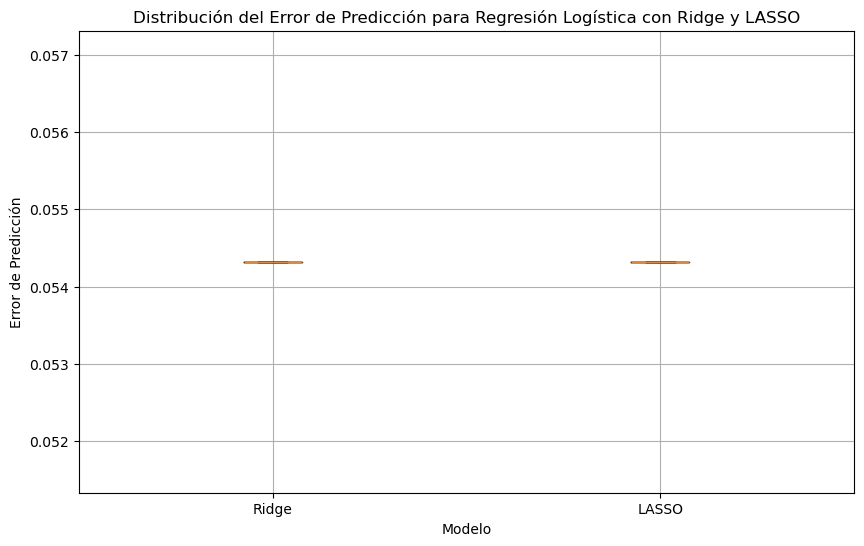

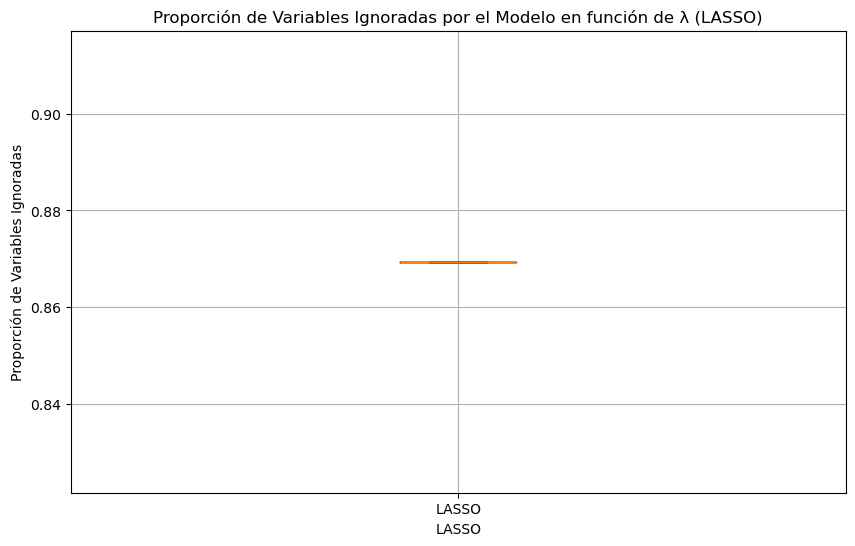

In [17]:
#2.1
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Funciones de evaluación y cross-validation
def evalua_metodo(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return {'accuracy': accuracy}


#2.2

def cross_validation(model, X, y, k=10):
    kf = KFold(n_splits=k)
    all_metrics = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        metrics = evalua_metodo(model, X_train, y_train, X_test, y_test)
        all_metrics.append(metrics['accuracy'])
    return np.mean(all_metrics)

#2.3

def evalua_config(model, param_grid, lambdas, k, X_train, y_train, X_val, y_val):
    best_config = None
    best_score = 0
    best_lambda = None
    all_results = []

    for config in param_grid:
        for lambda_value in lambdas:
            config['C'] = 1 / lambda_value
            model.set_params(**config)
            accuracy = cross_validation(model, X_train, y_train, k)
            result = {
                'config': config,
                'lambda': lambda_value,
                'accuracy': accuracy
            }
            all_results.append(result)
            if accuracy > best_score:
                best_score = accuracy
                best_config = config.copy()
                best_lambda = lambda_value

    model.set_params(**best_config)
    model.fit(X_train, y_train)
    best_metrics = evalua_metodo(model, X_train, y_train, X_val, y_val)
    return best_config, best_lambda, best_metrics

#2.4

def evalua_multiples_metodos(X, y, lambdas, k=10):
    results = []

    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

    param_grid_lr = [{'penalty': 'l2'}]  # Ridge

    lr_model = LogisticRegression(solver='liblinear')

    best_lr_config, best_lr_lambda, metrics_lr = evalua_config(lr_model, param_grid_lr, lambdas, k, X_train, y_train, X_val, y_val)
    results.append({
        'model': 'Logistic Regression (Ridge)',
        'config': best_lr_config,
        'lambda': best_lr_lambda,
        'metrics': metrics_lr
    })

    param_grid_lasso = [{'penalty': 'l1'}]  # LASSO

    lr_model_lasso = LogisticRegression(solver='liblinear')

    best_lasso_config, best_lasso_lambda, metrics_lasso = evalua_config(lr_model_lasso, param_grid_lasso, lambdas, k, X_train, y_train, X_val, y_val)
    results.append({
        'model': 'Logistic Regression (LASSO)',
        'config': best_lasso_config,
        'lambda': best_lasso_lambda,
        'metrics': metrics_lasso
    })

    return results

# Llenar los valores faltantes con 0
X = X.fillna(0)

# Calcular los valores de λ en una escala logarítmica
lambdas = np.logspace(-5, 5, num=11)

# Evaluar múltiples métodos con Ridge y LASSO
results = evalua_multiples_metodos(X, y, lambdas, k=10)

# Imprimir los resultados
print("\nResultados:")
for result in results:
    print(f"Modelo: {result['model']}")
    print(f"Lambda óptimo: {result['lambda']:.6f}")
    print(f"Precisión (accuracy): {result['metrics']['accuracy']:.4f}\n")

# Generar box-plot para mostrar la distribución del error de predicción
plt.figure(figsize=(10, 6))
errors_ridge = [1 - result['metrics']['accuracy'] for result in results if result['model'] == 'Logistic Regression (Ridge)']
errors_lasso = [1 - result['metrics']['accuracy'] for result in results if result['model'] == 'Logistic Regression (LASSO)']
labels = ['Ridge', 'LASSO']
plt.boxplot([errors_ridge, errors_lasso], labels=labels)
plt.title('Distribución del Error de Predicción para Regresión Logística con Ridge y LASSO')
plt.xlabel('Modelo')
plt.ylabel('Error de Predicción')
plt.grid(True)
plt.show()

# Box-plot para proporción de variables ignoradas por el modelo en LASSO
proportion_ignored = []
for result in results:
    if result['model'] == 'Logistic Regression (LASSO)':
        model = LogisticRegression(penalty='l1', C=1/result['lambda'], solver='liblinear')
        model.fit(X, y)
        proportion_ignored.append(np.mean(model.coef_ == 0))

plt.figure(figsize=(10, 6))
plt.boxplot(proportion_ignored, labels=['LASSO'])
plt.title('Proporción de Variables Ignoradas por el Modelo en función de λ (LASSO)')
plt.xlabel('LASSO')
plt.ylabel('Proporción de Variables Ignoradas')
plt.grid(True)
plt.show()


In [24]:
#3.6
from sklearn.linear_model import LogisticRegression, Lasso

# Suponemos que el mejor valor de lambda para LASSO fue encontrado anteriormente
best_lambda_lasso = 1000  # Suponemos que el primer resultado es el mejor para LASSO

# Definir la matriz independiente con el resto de las variables en respondieron
X_respondieron = respondieron.drop(columns=['pobre', 'CODUSU', 'MAS_500_x', 'MAS_500_y', 'CH05', 'PP09A_ESP'])

# Llenar los valores faltantes con 0 en la matriz independiente de respondieron
X_respondieron = X_respondieron.fillna(0)

# Entrenar el modelo de LASSO
lasso_model = Lasso(alpha=best_lambda_lasso)
lasso_model.fit(X_respondieron, y_respondieron)

# Obtener los coeficientes del modelo LASSO
coefficients = lasso_model.coef_

# Identificar las variables descartadas (coeficientes igual a cero)
variables_descartadas = X_respondieron.columns[coefficients == 0]
print(f"Variables descartadas por LASSO: {variables_descartadas}")

Variables descartadas por LASSO: Index(['ANO4_x', 'TRIMESTRE_x', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION_x',
       'AGLOMERADO_x', 'PONDERA_x', 'CH03', 'CH04',
       ...
       'PONDIH_y', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4',
       'habitantes_por_habitacion', 'ITF_por_personas_10_o_mas',
       'Ingreso_total_familiar_asistencia'],
      dtype='object', length=242)


3.7 y 3.8: Si observamos la precisión de los modelos vemos que LASSO es (levemente) más preciso a la hora de predecir que Ridge. Idealmente, usaremos LASSO para realizar la estiación. Esto quiere decir que el ECM de LASSO es menor que el de RIDGE para nuestros datos. 

In [32]:
#3.9 Ridge
from sklearn.preprocessing import StandardScaler

# Asegurarse de que respondieron y norespondieron no tengan NaNs y llenar con 0
respondieron = respondieron.fillna(0)
norespondieron = norespondieron.fillna(0)

# Definir la variable dependiente 'pobre' en respondieron
y_respondieron = respondieron['pobre']

# Elegir el mejor valor de lambda encontrado anteriormente para Ridge
best_lambda = 10000  
# Entrenar el modelo de Regresión Logística con Ridge
model_ridge = LogisticRegression(penalty='l2', C=1/best_lambda, solver='liblinear')
model_ridge.fit(X_respondieron, y_respondieron)

# Preparar los datos de norespondieron
X_norespondieron = norespondieron.drop(columns=['CODUSU', 'MAS_500_x', 'MAS_500_y', 'CH05', 'PP09A_ESP'])

# Llenar los valores faltantes con 0 en la matriz independiente de norespondieron
X_norespondieron = X_norespondieron.fillna(0)

# Predecir la variable 'pobre' en norespondieron
y_pred_norespondieron = model_ridge.predict(X_norespondieron)

# Calcular la proporción de hogares que son pobres en norespondieron
prop_pobres_norespondieron = np.mean(y_pred_norespondieron)
print(f"Proporción de hogares pobres en norespondieron: {prop_pobres_norespondieron:.4f}")

Proporción de hogares pobres en norespondieron: 0.5448


In [30]:
#3.9 LASSO


mejor_lambda_lasso = 1000  

lasso_model = Lasso(alpha=mejor_lambda_lasso, max_iter=1000)
lasso_model.fit(X_respondieron, y_respondieron)

X_norespondieron = norespondieron[X_respondieron.columns]

# Hacer predicciones
predicciones = lasso_model.predict(X_norespondieron)

# Determinar el estado de pobreza y calcular la proporción de hogares pobres
umbral_pobreza = 0.5
estado_pobreza = (predicciones >= umbral_pobreza).astype(int)

# Calcular la proporción de hogares pobres
proporcion_pobre = np.mean(estado_pobreza)
print(f'Proporción de hogares pobres: {proporcion_pobre:.2f}')

Proporción de hogares pobres: 0.00


C:\Users\Santiago\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.584e+01, tolerance: 1.778e-02
  model = cd_fast.enet_coordinate_descent(


Si bien sabemos que LASSO es el que minimiza el ECM, terminamos usando Ridge ya que la diferencia no es demasiado grande y LASSO no corre en nuestras computadoras como si es el caso de Ridge.